In [26]:
import pandas as pd

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# 1.Create a random dataset
rng = np.random.RandomState(seed=1)

Automatically created module for IPython interactive environment


In [ ]:
'''
numpy.random.RandomState()是一个伪随机数生成器。 ()括号内是seed，确保不同电脑上产生相同的伪随机数。
伪随机数是用确定性的算法计算出来的似来自[0,1]均匀分布的随机数序列。并不真正的随机，但具有类似于随机数的统计特征，如均匀性、独立性等。
运行一下下面两个
rng = np.random.RandomState(1)
x = rng.rand(4)
y = rng.rand(4)
rng = np.random.RandomState(1)
x = rng.rand(4)
rng = np.random.RandomState(1)
y = rng.rand(4)

.sort axis =0 每列从小到大排列

.ravel() 将多维数组降位一维

y[::5] 从开始到结束，每隔5个数，第0个开始取出算起，更加详细的取数组元素方式可以参看下面链接
https://blog.csdn.net/sinat_34474705/article/details/74458605
'''

In [27]:
X = np.sort(200 * rng.rand(100, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
# 从开始到结束，每隔5个数，第0个开始取出算起
y[::5, :] += (0.5 - rng.rand(20, 2))

In [28]:
# 2.Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=8)
regr_1.fit(X, y)
regr_2.fit(X, y)
regr_3.fit(X, y)

DecisionTreeRegressor(max_depth=8)

In [41]:
# 3.Predict
# 从-100 到100，每隔0.01取一个，然后把它插入新的维度
X_test = np.arange(-100.0, 100.0, 2)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
y_3 = regr_3.predict(X_test)

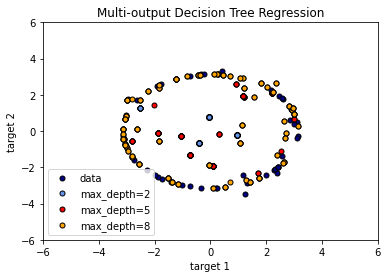

evs: 7.70%


In [42]:
# 4.Plot the results
from sklearn.metrics import explained_variance_score
plt.figure()
# 点的大小size
s =25
plt.scatter(y[:, 0], y[:, 1], c="navy", s=s,
            edgecolor="black", label="data")
plt.scatter(y_1[:, 0], y_1[:, 1], c="cornflowerblue", s=s,
            edgecolor="black", label="max_depth=2")
plt.scatter(y_2[:, 0], y_2[:, 1], c="red", s=s,
            edgecolor="black", label="max_depth=5")
plt.scatter(y_3[:, 0], y_3[:, 1], c="orange", s=s,
            edgecolor="black", label="max_depth=8")
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Multi-output Decision Tree Regression")
# 图例所有figure的位置
plt.legend(loc="best")
plt.show()
score=explained_variance_score(y,y_1)
print('evs: %.2f%%'%(score*100.0))

In [31]:
#测试准确率\精确率\召回率的接口，accuracy_score可以判断准确率
#classification_report  精确率\召回率的接口
from sklearn.metrics import accuracy_score,classification_report

In [43]:
#训练数据预估，（predict(训练数据) 得到训练结果）
# accuracy_score(y_test,y_pred)

,Unnamed: 0,date,price
0,0,0,0.0
1,1,1,1.0
2,2,2,2.5
3,3,3,3.5
4,4,4,4.0
5,5,5,5.0
6,6,6,6.0
7,7,7,7.0
8,8,8,8.0
9,9,9,9.0


In [9]:
# plt.xlabel("year")
# plt.ylabel("price")

C:\Users\king\AppData\Local\Temp\ipykernel_1092\1228973217.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train=data_train.date[:,np.newaxis]
C:\Users\king\AppData\Local\Temp\ipykernel_1092\1228973217.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_all=All_data.date[:,np.newaxis]


evs: 76.30%


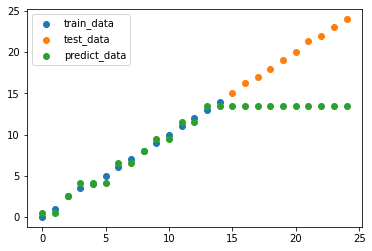

In [39]:
from sklearn.metrics import explained_variance_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
All_data=pd.read_csv("test_tree.csv")
data_train=All_data[All_data.date<15]
data_test=All_data[All_data.date>=15]
X_train=data_train.date[:,np.newaxis]
y_train=data_train.price
tree=DecisionTreeRegressor(max_depth=3).fit(X_train,y_train)
x_all=All_data.date[:,np.newaxis]
pred_tree=tree.predict(x_all)
plt.scatter(data_train.date,data_train.price,label="train_data")
plt.scatter(data_test.date,data_test.price,label="test_data")
plt.scatter(x_all,pred_tree,label="predict_data")
plt.legend()
score=explained_variance_score(All_data.price,pred_tree)
print('evs: %.2f%%'%(score*100.0))
# accuracy_score(All_data.price,pred_tree)

In [36]:
All_data.price

0      0.0
1      1.0
2      2.5
3      3.5
4      4.0
5      5.0
6      6.0
7      7.0
8      8.0
9      9.0
10    10.0
11    11.0
12    12.0
13    13.0
14    14.0
15    15.0
16    16.2
17    17.0
18    18.0
19    19.0
20    20.0
21    21.3
22    22.0
23    23.0
24    24.0
Name: price, dtype: float64

In [37]:
pred_tree

array([ 0.5       ,  0.5       ,  2.5       ,  4.16666667,  4.16666667,
        4.16666667,  6.5       ,  6.5       ,  8.        ,  9.5       ,
        9.5       , 11.5       , 11.5       , 13.5       , 13.5       ,
       13.5       , 13.5       , 13.5       , 13.5       , 13.5       ,
       13.5       , 13.5       , 13.5       , 13.5       , 13.5       ])